# Deteksi Penyakit Daun Padi

projek : agri ai, sistem deep learnning end to end untuk klasifikasi penyakit daun padi yang dapat di jalankan pada perangkat mobile.

tujuan : memberdayakan petani indo dengan alat bantu pertanian presisi yang bisa identifikasi penyakit secara cepat dan akurat. menurangi kehilangan hasil panen dan optimalkan pengguanan pestisida ke tumbuhan yang tidak membutuhkan, sehingga meningkatkan efisiensi penggunaaan dan lebh tepat menggunakannya.

metodologi : menggunakan cnn dan arsitektur lebih canggih dengan transfer learning. dan deploy siap digunakan di perangkat.

temuan : model seperti mobilenetv2 dirasa adalah model paling efisien, mungkin bisa mendaoatkan akurasi 95+ % dan tetap mempertahankan size yang kecil. serta waktu inferensi yang cepat. sekitar .5 detik per gambar.

dampa : solusi berpotensi menghemat biaya yang signigikan bagis petani dengan penggunaan pestisida yang efisien dan tepat sasaran.


## Section 1 : Defining the Problems


### 1.1 Pentingnya Produksi Padi di Asia Tenggara

Padi adalah makanan pokok utama di Asia Tenggara, bahkan bisa mencakup 76% dari asupan kalori harian. Tapi produksi padi sangat rentan terhadap serangan penyakit daun, seperti Blas Padi, yang bisa menyebabkan kehilangan hasil sampai 70–80%. Ini berdampak langsung ke pendapatan petani, pasokan pangan, dan bahkan bisa memicu inflasi harga pangan, apalagi jika ditambah faktor seperti El Niño atau larangan ekspor dari negara produsen.


### 1.2 Masalah yang Dihadapi Petani Indonesia

Petani sering tidak tahu penyakit apa yang menyerang padinya. Solusinya? Semprot semua dengan pestisida.

Masalahnya:
- Boros biaya
- Kurang efektif
- Merusak lingkungan dan kesehatan

Pertanian presisi dengan bantuan AI bisa jadi solusi:
Model AI di ponsel bisa bantu petani cepat tahu jenis penyakit dari foto daun → ambil keputusan lebih tepat dan hemat.


### 1.3 Jenis-Jenis Penyakit yang Dideteksi

Proyek ini mengklasifikasikan gambar daun padi menjadi 4 kelas:
- Bacterial Leaf Blight (BLB): Garis-garis kuning keputihan dari ujung daun, kadang muncul kerak putih.
- Leaf Blast: Luka berbentuk belah ketupat, tengah keputihan, tepi cokelat.
- Narrow Brown Spot: Bercak cokelat kecil memanjang sejajar tulang daun.
- Healthy: Daun hijau tanpa gejala apapun.


### 1.4 Ide Dasar AI-nya

Kita akan melatih model CNN untuk mengenali gejala dari foto daun.

Target utamanya:
- Akurat
- Ringan
- Cepat dipakai di HP

Tantangan utama:
- Gejala awal antar penyakit mirip (bintik kecil)
- AI bisa bingung bedain gambar-gambar ini → nanti jadi fokus analisis kesalahan model.


## Secton 2 : Initialize Project and Datasets

### 2.1. Import Dependencies and Set Up Parameters

In [3]:
!pip install -q split-folders

In [50]:
# Impor pustaka inti
import os
import zipfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import cv2
import splitfolders

# Impor pustaka spesifik untuk data loading dan augmentasi
from tensorflow.keras.utils import image_dataset_from_directory

# Impor pustaka untuk evaluasi model
from sklearn.metrics import classification_report, confusion_matrix

# Konfigurasi Global
# Menetapkan random seed untuk reproduktifitas
tf.random.set_seed(42)
np.random.seed(42)

# Parameter Proyek
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32
NUM_CLASSES = 4 # Bacterial Leaf Blight, Brown Spot, Leaf Smut, Healthy
EPOCHS = 50

### 2.2. Make Datasets Ready

source : https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases

In [5]:
# Upload kaggle.json
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ebgdae","key":"6e790f4d302aff99d8839e30e2b2db61"}'}

In [6]:
# Konfigurasi Kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
# Download dataset dari Kaggle
dataset_name = 'vbookshelf/rice-leaf-diseases'
zip_name = 'rice-leaf-diseases.zip'
!kaggle datasets download -d {dataset_name}

Dataset URL: https://www.kaggle.com/datasets/vbookshelf/rice-leaf-diseases
License(s): unknown
  0% 0.00/36.7M [00:00<?, ?B/s]
100% 36.7M/36.7M [00:00<00:00, 713MB/s]


In [8]:
# Ekstrak zip ke /content
!unzip -q {zip_name} -d /content
!rm {zip_name}  # hapus zip setelah ekstraksi

In [9]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
%cd /content

/content


In [16]:
import os
print(os.getcwd())

/content


In [13]:
%ls "/content/gdrive/MyDrive/Colab Notebooks"

'HAM Datasets'/   train/            Untitled1.ipynb
 padi/            Untitled0.ipynb   Untitled2.ipynb


In [19]:
!cp -r /content/rice_leaf_diseases "/content/gdrive/MyDrive/Colab Notebooks/padi/"

In [23]:
import os

# Lihat isi folder
os.listdir('/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases')

['Bacterial leaf blight', 'Brown spot', 'Leaf smut']

In [25]:
%ls -R '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases'

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases':
'Bacterial leaf blight'/  'Brown spot'/  'Leaf smut'/

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases/Bacterial leaf blight':
DSC_0365.JPG  DSC_0376.JPG  DSC_0384.JPG  DSC_0395.JPG  DSC_0403.JPG
DSC_0366.jpg  DSC_0377.JPG  DSC_0385.jpg  DSC_0396.JPG  DSC_0404.JPG
DSC_0367.JPG  DSC_0378.JPG  DSC_0386.JPG  DSC_0397.JPG  DSC_0405.JPG
DSC_0370.jpg  DSC_0379.JPG  DSC_0388.JPG  DSC_0398.JPG  DSC_0406.JPG
DSC_0372.JPG  DSC_0380.JPG  DSC_0389.JPG  DSC_0399.JPG  DSC_0700.jpg
DSC_0373.JPG  DSC_0381.JPG  DSC_0390.JPG  DSC_0400.JPG  DSC_0701.jpg
DSC_0374.JPG  DSC_0382.JPG  DSC_0392.JPG  DSC_0401.JPG  DSC_0702.jpg
DSC_0375.JPG  DSC_0383.JPG  DSC_0393.JPG  DSC_0402.JPG  DSC_0703.JPG

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases/Brown spot':
DSC_0100.jpg  DSC_0110.jpg  DSC_0118.jpg  DSC_0301.JPG  DSC_0324.JPG
DSC_0101.jpg  DSC_0111.jpg  DSC_0119.jpg  DSC_0302.JPG  DSC_0325.JPG
DSC_0104.jpg  DSC_01

### 1.3. Split Datasets

split data jadi training set, validation set sama test set, training untuk melatih dan update bobot, validaton utnuk setel hyperparameter dan monitor lebih lanjut, test untuk ngevaluasi model yang udah ditraining.

In [28]:
!mkdir -p '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split'

In [31]:
# direktori data yang udah di ekstrak
source_dir = '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases'

# direktori tujuan data split
output_dir = '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split'

# rasio pemisahan
split_ratio = (0.8, 0.1, 0.1)

print(f"Memisahkan data dari '{source_dir}' ke '{output_dir}'...")
# pake spltifolder untuk pisahin
splitfolders.ratio(source_dir, output_dir, seed=42, ratio=split_ratio, group_prefix=None)

print("Pemisahan data selesai. Struktur direktori baru:")
%ls -R '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split'

# Menetapkan path direktori untuk digunakan nanti
train_dir = os.path.join(output_dir, 'train')
val_dir = os.path.join(output_dir, 'val')
test_dir = os.path.join(output_dir, 'test')

Memisahkan data dari '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_diseases' ke '/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split'...


Copying files: 120 files [00:02, 48.76 files/s]


Pemisahan data selesai. Struktur direktori baru:
'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split':
test/  train/  val/

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split/test':
'Bacterial leaf blight'/  'Brown spot'/  'Leaf smut'/

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split/test/Bacterial leaf blight':
DSC_0366.jpg  DSC_0375.JPG  DSC_0383.JPG  DSC_0385.jpg

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split/test/Brown spot':
DSC_0101.jpg  DSC_0109.jpg  DSC_0117.jpg  DSC_0119.jpg

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split/test/Leaf smut':
DSC_0308.JPG  DSC_0315.jpg  DSC_0327.JPG  DSC_0330.jpg

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split/train':
'Bacterial leaf blight'/  'Brown spot'/  'Leaf smut'/

'/content/gdrive/MyDrive/Colab Notebooks/padi/rice_leaf_split/train/Bacterial leaf blight':
DSC_0365.JPG  DSC_0380.JPG  DSC_0392.JPG  DSC_0400.JPG  DSC_0700.jpg
DSC_0367.JPG  DSC_0381.JPG  DSC_0393.J

---

## Section 2 : EDA

### 2.1. Class Distribution



In [41]:
import pandas as pd

# Fungsi untuk membuat DataFrame dari folder dataset
def create_df_from_folders(root_dir):
    filepaths = []
    labels = []

    # Loop setiap subdirektori (anggap setiap subfolder = 1 kelas)
    for label in sorted(os.listdir(root_dir)):
        label_dir = os.path.join(root_dir, label)
        if not os.path.isdir(label_dir):
            continue  # skip file yang bukan folder

        for filename in os.listdir(label_dir):
            if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
                filepath = os.path.join(label_dir, filename)
                filepaths.append(filepath)
                labels.append(label)

    return pd.DataFrame({'filepath': filepaths, 'label': labels})

# Buat dataframe per split
train_df = create_df_from_folders(train_dir)
val_df = create_df_from_folders(val_dir)
test_df = create_df_from_folders(test_dir)

# Gabungkan semuanya untuk analisis
train_df['split'] = 'train'
val_df['split'] = 'val'
test_df['split'] = 'test'

full_df = pd.concat([train_df, val_df, test_df], ignore_index=True)

# Tampilkan distribusi label
print("Distribusi Kelas di Seluruh Dataset:")
print(full_df['label'].value_counts())

Distribusi Kelas di Seluruh Dataset:
label
Bacterial leaf blight    40
Brown spot               40
Leaf smut                40
Name: count, dtype: int64


In [43]:
full_df

,filepath,label,split
0,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Bacterial leaf blight,train
1,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Bacterial leaf blight,train
2,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Bacterial leaf blight,train
3,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Bacterial leaf blight,train
4,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Bacterial leaf blight,train
...,...,...,...
115,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Brown spot,test
116,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Leaf smut,test
117,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Leaf smut,test
118,/content/gdrive/MyDrive/Colab Notebooks/padi/r...,Leaf smut,test


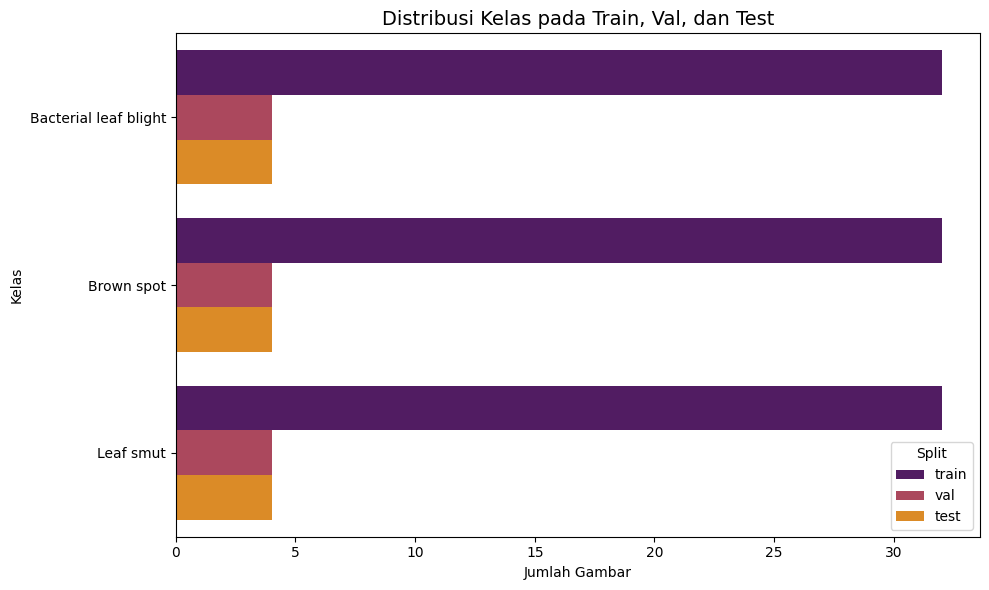

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi distribusi kelas per split
plt.figure(figsize=(10, 6))
sns.countplot(data=full_df, y='label', hue='split', palette='inferno')
plt.title('Distribusi Kelas pada Train, Val, dan Test', fontsize=14)
plt.xlabel('Jumlah Gambar')
plt.ylabel('Kelas')
plt.legend(title='Split')
plt.tight_layout()
plt.show()

*Catatan: Dataset ini sangat kecil dan seimbang. Dalam skenario dunia nyata, jumlah data akan jauh lebih besar dan seringkali tidak seimbang. Teknik yang disajikan di sini tetap berlaku dan bahkan menjadi lebih penting dalam skenario tersebut*

selanjutnya kita akan melihat sample dari gambar dari beberapa kelas berbeda untuk overview awal

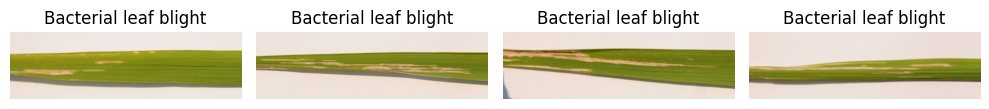

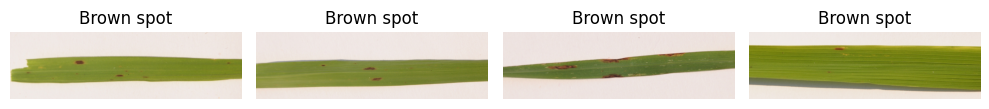

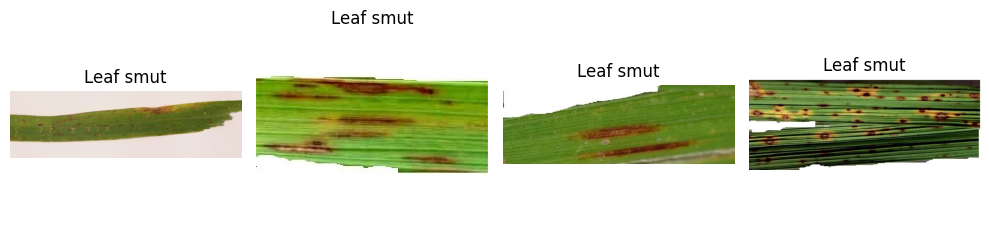

In [49]:
class_names = sorted(full_df['label'].unique())

for class_name in class_names:
    sample_images = full_df[full_df['label'] == class_name].sample(min(4, len(full_df[full_df['label'] == class_name])), random_state=42)['filepath'].tolist()

    plt.figure(figsize=(10, 4))
    for i, img_path in enumerate(sample_images):
        ax = plt.subplot(1, 4, i + 1)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

### 2.2. Image Dimention and Ration

karena model cnn menerima input yang sama, kita harus mentransformasi tiap gambar menjadi ukuran yang konsisten yaitu 224x224

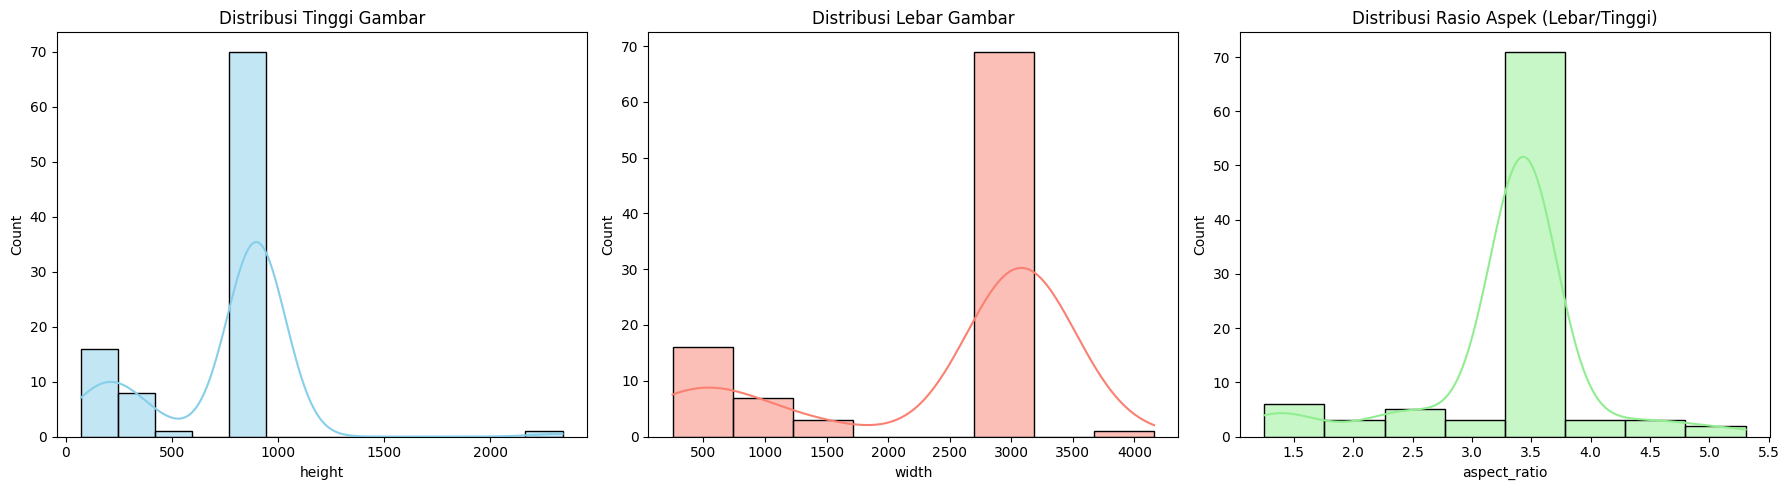

In [54]:
# Menganalisis dimensi gambar
image_dims = []
for img_path in train_df['filepath']:
    img = cv2.imread(img_path)
    if img is not None:
        h, w, _ = img.shape
        image_dims.append((h, w))

dims_df = pd.DataFrame(image_dims, columns=['height', 'width'])
dims_df['aspect_ratio'] = dims_df['width'] / dims_df['height']

# Visualisasi distribusi dimensi dan rasio aspek
plt.figure(figsize=(18, 5))

# Plot distribusi tinggi
plt.subplot(1, 3, 1)
sns.histplot(dims_df['height'], kde=True, color='skyblue')
plt.title('Distribusi Tinggi Gambar')

# Plot distribusi lebar
plt.subplot(1, 3, 2)
sns.histplot(dims_df['width'], kde=True, color='salmon')
plt.title('Distribusi Lebar Gambar')

# Plot distribusi rasio aspek
plt.subplot(1, 3, 3)
sns.histplot(dims_df['aspect_ratio'], kde=True, color='lightgreen')
plt.title('Distribusi Rasio Aspek (Lebar/Tinggi)')

plt.tight_layout()
plt.show()

In [55]:
print("Statistik Deskriptif Dimensi Gambar:")
dims_df.describe()

Statistik Deskriptif Dimensi Gambar:


,height,width,aspect_ratio
count,96.000000,96.000000,96.000000
mean,737.333333,2438.531250,3.297638
std,343.267601,1109.630426,0.701266
min,71.000000,250.000000,1.250000
25%,487.750000,1498.000000,3.434783
50%,897.000000,3081.000000,3.434783
75%,897.000000,3081.000000,3.434783
max,2340.000000,4160.000000,5.304659


**Analisis :**

sebagian besar gambar punya dimensi yang bervariasi walau ada mayoritas di ukuran tertentu. karena distribusi ukuran dan ratio yang tidak telalu merata ini, kita butuh mentrasformasikan gambar kita ke ukuran yang sama, yaitu 224x224

### 2.3. Color with RGB Histogram

dengan lihat grafik histogram warna untuk tiap kelas gambar daun, kita bisa tau seberapa sulit model membedakan pola untuk membedakan penyakit.

misal aja, kalau daun sehat banyak warna hijaunya dan daun BRownSpot banyak warna coklat/kuningnya, bererti perbedaannya jelas dan model bisa dengan mudah ngenalik pola.

sedangkan misalnya ga ada banyak perbedaan atau warna dari beberapa kelas itu sama sama aja, model gabisa belajar dari warna saja dan perlu belajar teksturnya juga. ini lebih ke menjawab pertanyaan apakah warna cukup untuk jadi pembeda atau pola dari kelas, atau perlu fitur lain juga.

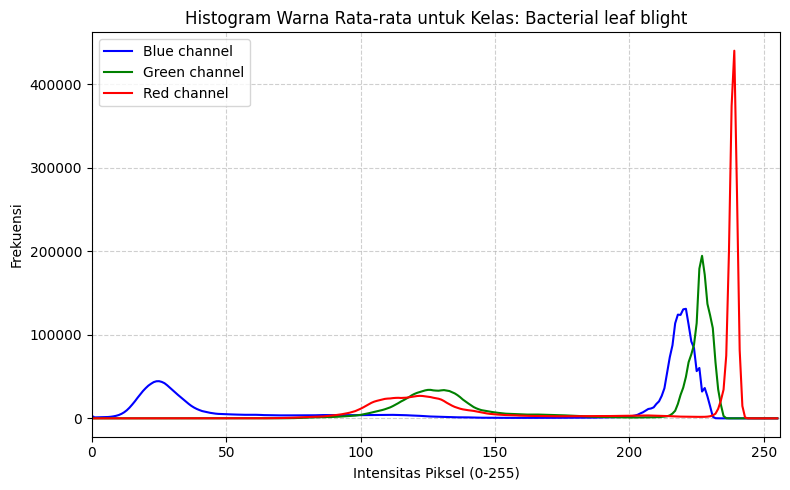

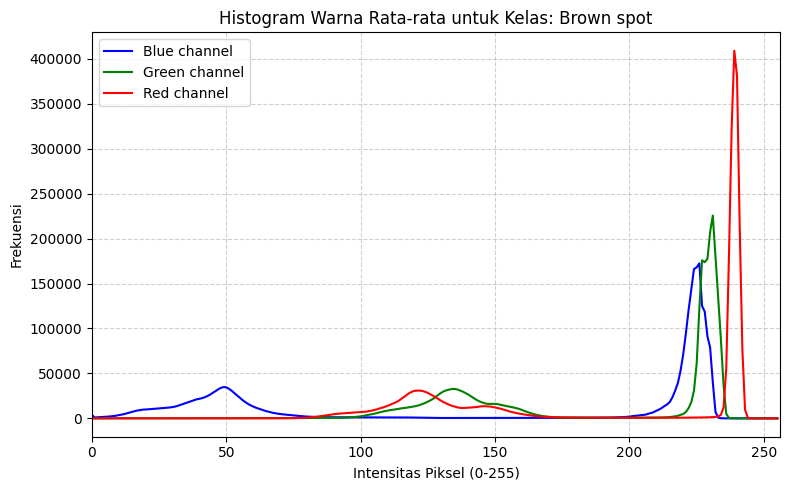

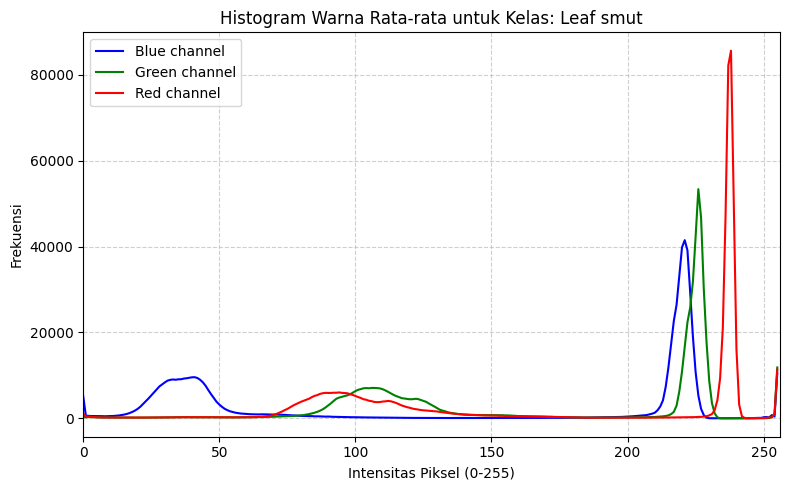

In [57]:
def plot_class_color_histograms(df, class_name, num_samples=5):
    """Menghitung dan memplot histogram warna rata-rata untuk kelas tertentu."""
    class_df = df[df['label'] == class_name]
    sample_paths = class_df.sample(min(num_samples, len(class_df)), random_state=42)['filepath']

    avg_hist = np.zeros((256, 3))
    for img_path in sample_paths:
        img = cv2.imread(img_path)
        if img is None:
            continue

        # Hitung histogram untuk setiap channel B, G, R
        for i in range(3):
            hist = cv2.calcHist([img], [i], None, [256], [0, 256])
            avg_hist[:, i] += hist.flatten()

    avg_hist /= len(sample_paths)  # Rata-rata histogram

    # Plot histogram
    plt.figure(figsize=(8, 5))
    colors = ('blue', 'green', 'red')
    for i, color in enumerate(colors):
        plt.plot(avg_hist[:, i], color=color, label=f'{color.capitalize()} channel')

    plt.title(f'Histogram Warna Rata-rata untuk Kelas: {class_name}')
    plt.xlabel('Intensitas Piksel (0-255)')
    plt.ylabel('Frekuensi')
    plt.xlim([0, 256])
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Plot histogram untuk semua kelas
for class_name in class_names:
    plot_class_color_histograms(full_df, class_name)

Analisis histogram warna RGB membantu kita memahami apakah perbedaan warna antar kelas daun cukup signifikan untuk dijadikan fitur pembeda oleh model.

Sebagai contoh, pada histogram untuk kelas Bacterial leaf blight (gambar terlampir), kita lihat:
- Channel merah (R) memiliki puncak tajam di intensitas tinggi (~240), menunjukkan dominasi elemen cerah kemerahan.
- Channel hijau (G) juga menunjukkan puncak, tapi dengan intensitas lebih rendah (~225), yang mengindikasikan masih ada elemen hijau khas daun.
- Channel biru (B) punya dua puncak, satu di area rendah (~25) dan satu lagi di area tinggi (~220), menunjukkan kehadiran elemen gelap dan terang sekaligus.

Interpretasi:
- Profil warna ini menunjukkan variasi warna yang cukup kompleks. Ada dominasi warna terang di area merah dan hijau, namun juga muncul nilai rendah di channel biru, yang bisa berasal dari area bayangan atau gejala penyakit.
- Ini menunjukkan bahwa model bisa menggunakan warna sebagai sinyal awal, tapi kompleksitasnya cukup tinggi — tidak sesederhana membedakan hijau vs coklat.

Kesimpulan awal:
- Jika kita bandingkan dengan kelas lain seperti Healthy, yang seharusnya lebih dominan hijau, maka kita bisa menilai apakah warna cukup kuat sebagai fitur.
- Namun jika histogram antar kelas tampak serupa, maka model harus belajar dari fitur tekstur atau bentuk, bukan hanya warna.

Dengan analisis ini, kita bisa menjawab pertanyaan penting dalam EDA:

“Apakah warna cukup membedakan antar kelas?”
Dan jika tidak, kita tahu bahwa augmentasi tekstur dan pemrosesan spasial lebih penting di tahap modeling.

---


## Section 3 : Preprocessing and Data Augmentation


Disini, kita bakal pake tf.data yang bisa handle

**penggunaan GPU yang lebih efisien** :  saat kita melatih model dengan tensorflow, terutama pake gpu, itu tuh butuh aliran data gambar yang terus menerus dan cepat. kalo ga, gpu bisa nganggur, karena perlu tunggu data datang dari cpu -> ram -> disk

tf.data itu semacam jalur pipa khusus yang dipake untuk baca data. augmentasi data, atur batch dan alirin data dengan efisien ke GPU.

analoginya, koki masak di dapur, bahannya harus dianterin, kalo dianterinya lama, koki nganggur, tapi kalo cepet, koki bakal masak terus.

**augmentasi on the fly** : proses augmentasi data, misal gambar di crop, rotasi dan lain lain, dilakukan langsung saat training, bukan disimpan sebagai file. sehingga hemat storage.


### 3.1. Preprocessing with `tf.data`

In [58]:
# Membuat dataset menggunakan image_dataset_from_directory
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='bilinear',
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=42
)

val_ds = image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='bilinear',
    batch_size=BATCH_SIZE,
    shuffle=False # Tidak perlu shuffle data validasi
)

test_ds = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=IMAGE_SIZE,
    interpolation='bilinear',
    batch_size=BATCH_SIZE,
    shuffle=False # Tidak perlu shuffle data test
)

# Verifikasi nama kelas
class_names = train_ds.class_names
print("Kelas yang ditemukan:", class_names)

Found 96 files belonging to 3 classes.
Found 12 files belonging to 3 classes.
Found 12 files belonging to 3 classes.
Kelas yang ditemukan: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [59]:
# Mengoptimalkan pipeline data untuk kinerja
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

### 3.2. Normalization and Transforn

Langkah-langkah pra pemrosesan seperti pengubahan ukuran dan normalisasi diintegrasikan langsung ke dalam pipeline `tf.data` menggunakan *Keras Preprocessing Layers*. Pendekatan ini memastikan bahwa transformasi ini adalah bagian dari grafik komputasi model dan dapat diekspor bersama dengan model yang disimpan.

tf.keras.layers.Rescaling: Menormalkan nilai piksel dari rentang ke. Ini sangat penting untuk pelatihan yang stabil dan konvergensi yang lebih cepat, karena menjaga gradien dalam rentang yang wajar.

Catatan: Resizing sudah ditangani oleh image_dataset_from_directory, tetapi jika memuat data secara manual, tf.keras.layers.Resizing akan digunakan di sini.